# Overall structure

* So we will talk a little bit about peergrade
* We are halfway into the course
* Peergrade is about literature on this course. Peergrade is for us all a big reading group
* Peergrade is your place, it is what you enact it to be
* Look at all the nice things we have created
** joyplot
* but that's not maybe what we want
* there are relations here
** generator
* Here are some very nice examples of good reflections
* Reading is also about reading to write
* Somebody also picked up the literary style of Law's "crazy" text (the honey one)
* Considering how peergrade is set up, a good reflection is something that is useful when you *receive* feedback to it. Valuable twice
* Here are some cool reflection <-> feedback interactions
* Maybe there is some "media studies" lesson here that you can think about in your projects too
* Keep on being awesome 🦄

![](https://www.peergrade.io/wp-content/uploads/2017/06/peergrade-blue-300x67.png)

# We are halfway into the course

1. **Complexity Thinking**
1. **Qualitative Approaches to Quantitative Data**
1. **What are Digital Methods?**
1. **Methods Make Worlds**
1. **Problematization**
1. **Network Effects**
1. Situational Mapping
1. Thick Data
1. Data Politics and Publics
1. Mapping Worlds
1. Visualizing Data
1. Storytelling with Data

# Peergrade is a big reading group

<img src="https://www.westernsydney.edu.au/__data/assets/image/0006/852144/ien_ang_2015.jpg" style="float: left; height: 150px"/>

<img src="http://www.sussex.ac.uk/images/people/profile/7513.jpg" style="float: left; height: 150px;"/>

<img src="http://www.tommasoventurini.it/wp/wp-content/uploads/2016/01/TommasoVenturini_large.jpg" style="float: left; height: 150px;"/>

<img src="https://thebreakthrough.org/images/people_profiles/Bruno-Latour-1.jpg" style="float: left; height: 150px;"/>

<img src="https://i1.rgstatic.net/ii/profile.image/AS%3A285798063722497%401445150976911_l/Richard_Rogers13.png" style="float: left; height: 150px;"/>

<img src="https://www2.warwick.ac.uk/fac/cross_fac/cim/people/academic/noortje.jpg?maxWidth=344&maxHeight=344" style="float: left; height: 150px;"/>

<img src="https://pbs.twimg.com/profile_images/658510005579022336/qtPqMAM2.jpg" style="float: left; height: 150px;"/>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Lucy_Suchman.jpeg/220px-Lucy_Suchman.jpeg" style="float: left; height: 150px;"/>

<img src="http://theconversant.org/wp-content/uploads/2012/12/Haraway-Photo-1.jpg" style="float: left; height: 150px;"/>

<img src="https://images.gr-assets.com/authors/1406520120p5/1276828.jpg" style="float: left; height: 150px;"/>

<img src="http://interaction16.ixda.org/wp-content/uploads/2016/01/wang_tricia-1.jpg" style="float: left; height: 150px;"/>

<img src="http://www.dugumkume.org/wp-content/john-law2.jpg" style="float: left; height: 150px;"/>

<img src="http://www.gurteen.com/gurteen/gurteen.nsf/id/L000992/$File/snowden.jpg" style="float: left; height: 150px;"/>

<img src="http://www.maryboone.com/images/Keynote%20Photo.jpg" style="float: left; height: 150px;"/>

# Peergrade is your place, it is what you enact it to be

## Python environment imports and setup

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats
import lxml.html
import lxml.etree
import zipfile
import string
import nltk
import networkx as nx
import random

In [3]:
%matplotlib inline
sns.set()
sns.set_context("talk")

## Data definitions

About the course and the actual data, namely student reflections.

In [1]:
refllen = 300

files = ["reflections-week2.zip",
         "reflections-week3.zip",
         "reflections-week4.zip",
         "reflections-week5.zip",
         "reflections-week6.zip",
         "reflections-week7.zip"]

## Reading the data

In [4]:
def readPeergradeFile(filename):
    """Given a filename, assumes it is a Peergrade assignment and reads it into a dict."""
    assignment = dict()
    with zipfile.ZipFile(filename) as zf:
        for name in zf.namelist():
            if not name.endswith(".ipynb"):
                with zf.open(name) as file:
                    assignment[name.strip(".html")] = lxml.html.document_fromstring(file.read().decode('utf-8'))
    return assignment

In [5]:
data = {}
data["week2"] = readPeergradeFile(files[0])
data["week3"] = readPeergradeFile(files[1])
data["week4"] = readPeergradeFile(files[2])
data["week5"] = readPeergradeFile(files[3])
data["week6"] = readPeergradeFile(files[4])
data["week7"] = readPeergradeFile(files[5])

## Extract the reflections and start NLP by tokenizing

In [6]:
punctremover = str.maketrans('', '', string.punctuation)

def getReflection(data, student):
    """Given data dictionary and student name string, return their reflection as is, as a list."""
    return ''.join(token for token in data.get(student).getchildren()[1].itertext()).strip()

## Analyze reflection lengths

In [7]:
def reflLen(reflection):
    """Given a list of tokens, removes all punctuation and returns it's length in words."""
    l = [token.translate(punctremover) for token in reflection.split(' ')]
    return len(l)

In [9]:
weeklens = pd.DataFrame({
    'Week2': pd.Series([reflLen(getReflection(data["week2"], n)) for n in data["week2"]], index=data["week2"].keys(), name="Week 2"),
    'Week3': pd.Series([reflLen(getReflection(data["week3"], n)) for n in data["week3"]], index=data["week3"].keys(), name="Week 3"),
    'Week4': pd.Series([reflLen(getReflection(data["week4"], n)) for n in data["week4"]], index=data["week4"].keys(), name="Week 4"),
    'Week5': pd.Series([reflLen(getReflection(data["week5"], n)) for n in data["week5"]], index=data["week5"].keys(), name="Week 5"),
    'Week6': pd.Series([reflLen(getReflection(data["week6"], n)) for n in data["week6"]], index=data["week6"].keys(), name="Week 6"),
    'Week7': pd.Series([reflLen(getReflection(data["week7"], n)) for n in data["week7"]], index=data["week7"].keys(), name="Week 7")
})

For joyplot with `seaborn`, we want to melt the data to narrow shape. So let's do that.

In [10]:
weeklens_m = weeklens.melt()
print(weeklens_m["variable"].value_counts())
weeklens_m.sample(3)

Week4    131
Week2    131
Week7    131
Week6    131
Week3    131
Week5    131
Name: variable, dtype: int64


,variable,value
744,Week7,310.0
419,Week5,NaN
551,Week6,305.0


In [11]:
def joyplot(data):
    """Given a dataframe, plots a joyplot"""
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    sns.set_context("talk")
    pal = sns.cubehelix_palette(len(data["variable"].unique()), rot=0.2, light=0.8, dark=0.4)
    g = sns.FacetGrid(data, row="variable", hue="variable", aspect=10, size=1, palette=pal)
    g.map(sns.kdeplot, "value", bw=.2, lw=1, shade=True, alpha=1, clip_on=False)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)
    g.set_titles("")
    g.fig.subplots_adjust(hspace=-0.8)
    plt.axvline(300, ls="dotted", c="black", lw=6)
    g.set(yticks=[])
    g.despine(bottom=True, left=True);

# Look at all the nice things we have created

~120 students, one 300 word reflection per week, and two 100 word feedbacks to anonymous¹ peers each. 6 weeks so far, out of 14.

¹ well "anonymous"

Distribution of reflection lengths, first week at the back, and newer weeks at the front.

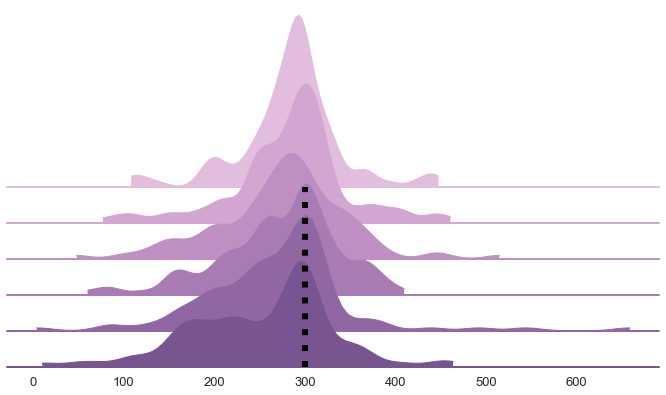

In [12]:
joyplot(weeklens_m)

What else can we know?

# A language model

To gain intuition by exploring and by distancing, we used some machine learning to create this thing which we taught to speak like you. The language model is a network of all the words that you have written.

## Basic idea of the model

A little sketch to explain the idea.

In [191]:
mmexample = nx.DiGraph()
mmexample.add_weighted_edges_from([
    ("I", "love", 5),
    ("I", "hate", 1),
    ("love", "complexity", 3),
    ("love", "unicorns", 2),
    ("hate", "unicorns", 1)
])

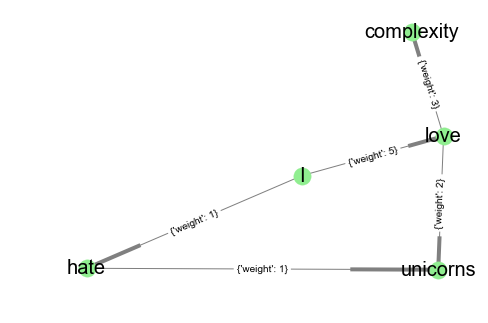

In [199]:
pos = nx.spring_layout(mmexample)
nx.draw(mmexample, pos, node_color="lightgreen", edge_color="grey")
nx.draw_networkx_labels(mmexample, pos, font_size=20)
nx.draw_networkx_edge_labels(mmexample, pos);

In [13]:
def makePairs(arr):
    pairs = []
    for i in range(len(arr)):
        if i < len(arr)-1: 
            temp = (arr[i], arr[i+1])
            pairs.append(temp)
    return pairs

def generate(cfd, word = 'the', num = 300):
    for i in range(num):
        # make an array with the words shown by proper count
        arr = []
        for j in cfd[word]:
            for k in range(cfd[word][j]):
                arr.append(j)
        
        print(word, end=' ')
        # choose the word randomly from the conditional distribution
        word = arr[int((len(arr))*random.random())]

In [14]:
tokenizer = nltk.WordPunctTokenizer()

In [15]:
def markovModel(week):
    pairs = []
    for student in week:
        pairs.extend(makePairs(tokenizer.tokenize(week[student].body.text_content())))
    return nltk.ConditionalFreqDist(pairs)

A model for each week separately

In [16]:
week2cfd = markovModel(data["week2"])
week3cfd = markovModel(data["week3"])
week4cfd = markovModel(data["week4"])
week5cfd = markovModel(data["week5"])
week6cfd = markovModel(data["week6"])
week7cfd = markovModel(data["week7"])

## A sum model

In [17]:
def addModel(cfd1, cfd2):
    """Adds cfd2 to cfd1"""
    l1 = len(cfd1)
    l2 = len(cfd2)
    for cond in cfd2:
        if cond in cfd1:
            for other in cfd2[cond]:
                if other in cfd1[cond]:
                    cfd1[cond][other] += cfd2[cond][other]
                else:
                    cfd1[cond][other] = cfd2[cond][other]
        else:
            cfd1[cond] = cfd2[cond]
    print("Added", len(cfd1) - l1, "terms from", l2)

In [18]:
cfd = nltk.ConditionalFreqDist()
addModel(cfd, week2cfd)
addModel(cfd, week3cfd)
addModel(cfd, week4cfd)
addModel(cfd, week5cfd)
addModel(cfd, week6cfd)
addModel(cfd, week7cfd)
print("Total number of states in this model:", len(cfd))

Added 3998 terms from 3998
Added 1919 terms from 3896
Added 1526 terms from 4025
Added 1133 terms from 3808
Added 1023 terms from 3774
Added 602 terms from 3132
Total number of states in this model: 10201


Convert the Markov Model to a weighted graph $g = \langle V, E\rangle$ `networkx.DiGraph` object, which we might have done all along, instead of `nltk.ConditionalFreqDist`.

In [19]:
mmg = nx.DiGraph()
for token in cfd:
    for other in cfd[token].items():
        mmg.add_weighted_edges_from([(token, other[0], 1 / other[1])])

Save the graph to a file, for poking around in Gephi.

In [20]:
nx.write_gexf(mmg, "languagemarkov.gexf")

![](gephi-hairball.png)

We would like to be able to traverse the graph, and each of the student reflections is a random walk in this graph. And we can walk more!

In [21]:
def prevWord(cfd, word):
    """Given a conditional frequendy distribution _cfd_, prints transitions to _word_."""
    transitions = {}
    for candidate in cfd:
        if word in cfd[candidate]:
            transitions[candidate] = cfd[candidate][word]
            print(candidate, "→", word, cfd[candidate][word])

In [22]:
cfd["navigating"]

FreqDist({'complex': 1,
          'complexities': 1,
          'complexity': 2,
          'controversies': 1,
          'in': 5,
          'through': 2})

In [23]:
prevWord(cfd, "complexity")

understand → complexity 2
the → complexity 50
between → complexity 1
and → complexity 3
of → complexity 21
to → complexity 4
that → complexity 1
what → complexity 1
approach → complexity 1
in → complexity 6
, → complexity 2
using → complexity 1
‘ → complexity 1
with → complexity 3
s → complexity 1
a → complexity 6
this → complexity 2
navigating → complexity 2
how → complexity 1
/ → complexity 1
on → complexity 7
: → complexity 1
into → complexity 1
examining → complexity 1
term → complexity 1
understanding → complexity 3
within → complexity 1
specific → complexity 1
social → complexity 1
any → complexity 2
interpret → complexity 1
its → complexity 5
simple → complexity 1
where → complexity 1
because → complexity 1
analyzing → complexity 2
their → complexity 1
modern → complexity 2
word → complexity 1
analyze → complexity 1
massive → complexity 1
see → complexity 1
explaining → complexity 1
simplifying → complexity 1
visualise → complexity 1
mapping → complexity 3
Navigating → complexit

In [51]:
generate(cfd, word="practical", num=50)

practical tool or disciplined ) and “ giving a means of one right answer to know , he uses the inner abilities to “ thing coming out that it still be critical while still a country , “ The role does not an actor - coherent . Though ultimately have 

In [52]:
generate(cfd, word="practical", num=50)

practical process of how Big Data creates confusion I found it became the necessity to put into the model can answer ” approach are always better decision - 6 . A person in regards to study . I really interesting that ultimately this data - points . Wang suggests to 

In [53]:
generate(cfd, word="practical", num=50)

practical sense , but may depends on your own presumptions . Latour made in my perception of metaphora and the world do here being rather than the professors are many different situations Snowden and ‘ by the amount of objectivity suffers from a group of sense of their conceptions ’ 

In [54]:
generate(cfd, word="practical", num=50)

practical use of inquiries one is questioned by complexities . To sum up , I have been a real world of a deep insight of humanists and particular events and about how much easier to examine these questions that now , there are so , that I totally agree with 

In [55]:
generate(cfd, word="practical", num=50)

practical examples and explanation of different sort of it comes to tell stories which is possible route to place … A Leader ’ by Lucy Suchman and nudity of multiple actors - for division of techniques that mediate between Actornetwork theory . Design from Haraway the ‘ routine - budgets 

![](https://media.giphy.com/media/giHQ2odvRQ5oc/giphy.gif)

Dialectic or dialectics (Greek: διαλεκτική, dialektikḗ), also known as the dialectical method, is a **discourse** between two or more people holding different points of view about a subject but wishing to establish the truth through reasoned arguments.


Step one: **join the conversation**

![](https://i.pinimg.com/originals/2a/f0/3f/2af03f92558d942c49caaaf548de8508.jpg)

-> example here 

Step two: **recontextualize**

![](https://m.popkey.co/4996c3/ZmAjR.gif)

"When dining out and enjoying for instance a Spaghetti Bolognese regular people only see the dish as a whole but does not notice the tomatoes, onions, garlic, beef, flower, and eggs that actually constitutes the dish. When a chef deconstructs this dish he makes sure that every element is explicitly visible in order to gain an understanding of the food. The manager and his great power, that Law describes, is not worth much without his computer, meeting rooms, or his ability to speak – **just like the spaghetti Bolognese without eggs, flower, tomatoes**"

“Reading this article **made me think of** how our modern-day Western economies follow the implications of neoclassical theory. Very much like organisational theory models, this theory is based on idealistic assumptions"

"**This** multiplicity **reminds me of** both Virginia Woolf’s 1928 novel Orlando and Hermann Hesse’s 1929 Steppenwolf that both present conceptions of the self that are multiple and constructed. Wolf states that Orlando’s - the protagonist of her book - true self is the compact of many selves, all of the possible Orlandos that had been or still might be. No one or two of these is sufficient to make up the full range of Orlando’s complexity. This very same lesson, that one’s personality is made up of multiple, changing, and discontinuous selves, takes Harry - half man, half wolf and several other archetypical personalities and protagonist of the Steppenwolf - the entire novel and more to learn."

Step three: **embed** 

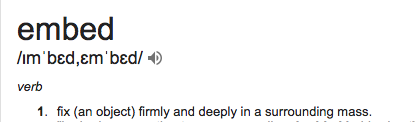

"Like organisations or machines, made up of all sorts of different parts, we are functioning as human beings because of our multifaceted selves, and should therefore not seek to have just one voice/opinion/view/personality, but instead remember all the parts we are made of, all the different logics we consist of, before we make choices. That is the true responsibility of acknowledging that we consist of many realms, many logics, many selves."

"[...] instead of imposing order in a complex context I will strive to step back a bit and allow the patterns to emerge"

"[...] situated knowledge promotes and encourages the exchange of ideas between fellow human beings with limited points of view, and as they share their knowledge and allow an understanding of their respective contexts they can grow and allow their points of view to become larger and comprehensive. Situated knowledge not only allows us to entertain richer and more complete points of view through dialogues, but it ultimately promotes a sense of community and allows us to be accountable for what we believe in." 


Reading is also about learning to write

Somebody picked up the Law style of writing to write satire

> ... Here we have a student. *X* is the student. ‘Why’ he says, ‘why are we reading this text?’ What on earth is going on?’. He is annoyed. Annoyed by the simple morality of the text, annoyed by the terrible language ...

And the feedback was pretty priceless too ;)

>> ... Nevertheless, student now has a choice. He can either be annoyed for a long time or he has to look beyond the terrible texts. Because what student is missing is a context ...

Considering how Peergrade is set up, a good reflection is something that is useful when you *receive* feedback to it. It is valuable twice

![Feedback](https://upload.wikimedia.org/wikipedia/commons/b/b0/General_Feedback_Loop.svg)

Here are some good reflection ↔ feedback interactions we found

## Q & A

> "Situated knowledges are about communities, not about isolated individuals. The only way to find a larger vision is **to be somewhere in particular**". – Not sure what does it means to be in particular?
>>  In regards to Haraway writing about being **'somewhere in particular'**, **I think she means that** in order to gain a larger insight on knowledge (in a specific context), one must be somewhere in the middle of the community where knowledge is being created. 

## A challenge based on the literature

>> The last statement is one that i disagree with."And that since every examination is based on one specific case in a specific setting **it will be hard to ever make any conclusions**." Eventhough every examination is based on a specific case and in a specific setting, **Venturini states that one can get around this subjectivity by using multiple perspectives** as a way of **obtaining objectivity and impartial results/observations**.

## A challenge of the literature

>> About designer leaving their personal mark on the products they produce – **I have to disagree with the statement that “designers are encouraged to be ignorant towards their social positions** and only view technologies as objects and themselves as their creators”. **I think that it is important to leave some kind of personal mark on each and every product**, in order to make the design/work unique and not to look like any other computer generated output.

## A correction of background research

>> I was quite confused by your description of **John Laws death**, as I'm sure he's alive. I googled it for you and you should not just take the first google result. The John Law who wrote this text is a sociologist, **alive and well**, though aged 71, and **one of the founders of Actor Network Theory**.

## An advice (with a meta-example)

>> **try to put some of discussed concepts in a context or think of an example that would reflect theories you read about**. **For example**, think about how certain experiences are particularly valuable in the generation process, since knowledge is produced in a specific social context,

## An encouragement

>> I find it quite impressive how you’ve been able to reflect upon the “Andrew story” by generalising it so that it is applicable to situations with other circumstances. Hereby your reflection aren’t only a description of some concepts from the text, you also give room for the reader to reflect on your understanding. Keep up the good work ☺


## A push forward

> Situated Knowledge is an interesting epistemology that I believe takes its base in Constructivism
>> You mention in your reflection that she takes her standpoint in constructivism. I think you **got something, but which form of constructivism do you think** she "supports"?

## A motivation of the study program

>> This is really what DIM is about, and I think we need to understand how developers think, and we have to try to make developers understand how non-developers think. And an approach to this is through Haraways thoughts about feminism. I hope this makes some sense to you:)

## What else?

What has your experience been? What has helped you?

![](https://skullsinthestars.files.wordpress.com/2011/07/nickieatmirror.jpg)

Maybe there is some lesson here that you can think about in your projects too: what does the organization of the situation do to knowledge creation and interactions

# ✨ 🦄

Keep on being awesome 